# Backtest with Yves Hilpish

Cloned from https://github.com/yhilpisch/py4at/blob/master/ch04/04_pyalgo.ipynb

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

import SMAVectorBacktester as SMA 

## Strategy - Simple Moving Averages

Data is from [Bank of England](https://www.bankofengland.co.uk/statistics/exchange-rates).

In [2]:
smabt = SMA.SMAVectorBacktester('USDGBP', 42, 252, '1975-12-29', '2024-09-06', '../data/BankOfEngland-USDGBP.csv')
smabt.data.tail()

,price,return,SMA1,SMA2
Date,,,,
2024-09-02,1.3152,0.000608,1.291676,1.261173
2024-09-03,1.3095,-0.004343,1.292469,1.261388
2024-09-04,1.3161,0.005027,1.293333,1.261654
2024-09-05,1.3158,-0.000228,1.294107,1.261924
2024-09-06,1.3160,0.000152,1.294971,1.262192


In [3]:
smabt.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12308 entries, 1975-12-29 to 2024-09-06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   12308 non-null  float64
 1   return  12307 non-null  float64
 2   SMA1    12267 non-null  float64
 3   SMA2    12057 non-null  float64
dtypes: float64(4)
memory usage: 480.8 KB


In [4]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'

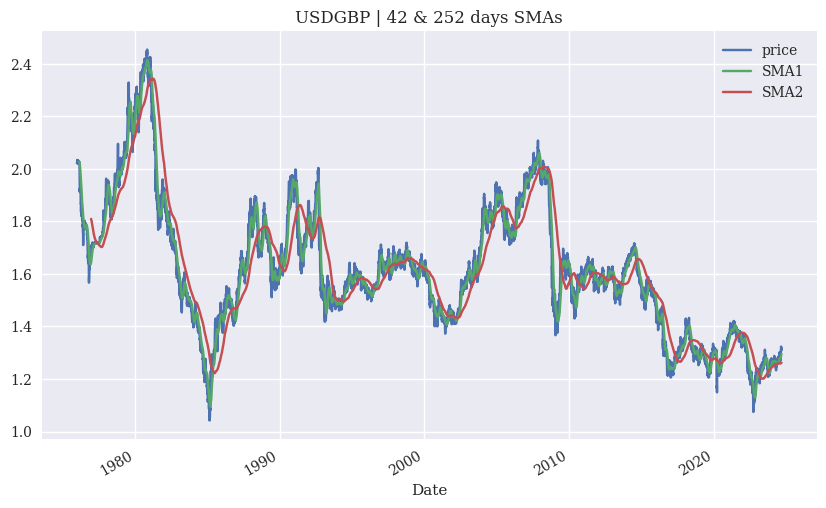

In [5]:
smabt.data[['price', 'SMA1', 'SMA2']].plot(title='USDGBP | 42 & 252 days SMAs', figsize=(10, 6))

In [6]:
smabt.run_strategy()

(2.28, 1.5)

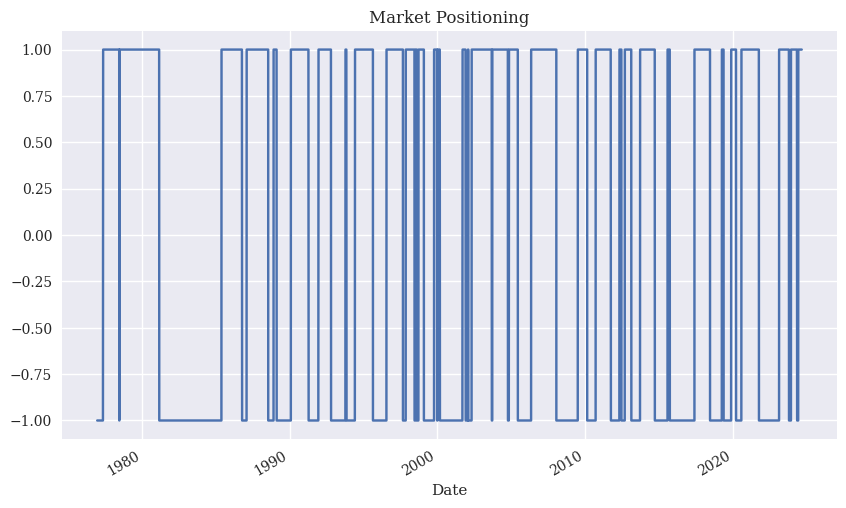

In [7]:
smabt.results['position'].plot(ylim=[-1.1, 1.1], 
                               title='Market Positioning',
                               figsize=(10, 6))

<Axes: >

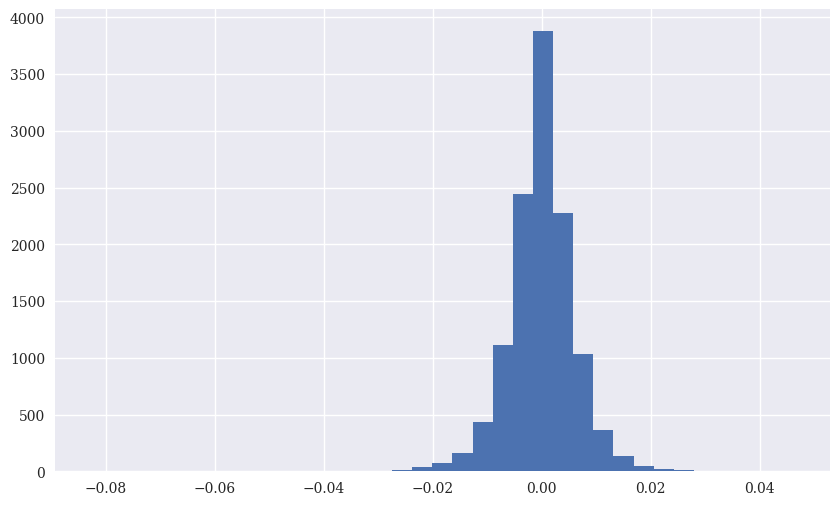

In [8]:
data = smabt.results
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data['returns'].hist(bins=35, figsize=(10, 6))

<Axes: xlabel='Date'>

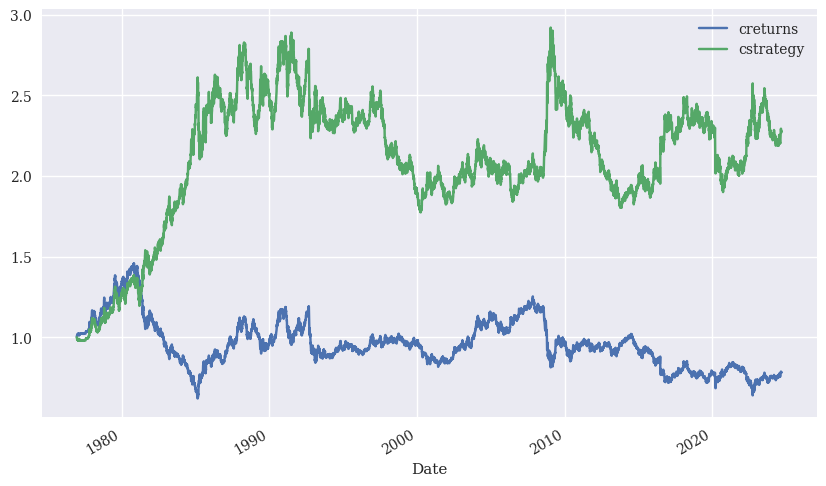

In [9]:
data[['creturns', 'cstrategy']].plot(figsize=(10, 6))

In [10]:
data[['returns', 'strategy']].mean() * 252

returns    -0.005166
strategy    0.017234
dtype: float64

In [11]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.097979
strategy    0.097970
dtype: float64

<Axes: xlabel='Date'>

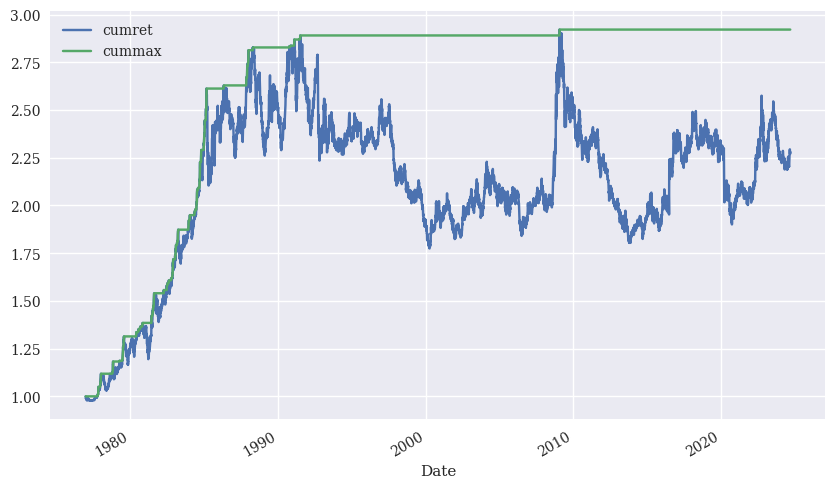

In [12]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6))

In [13]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

1.1180070503304085

In [14]:
temp = drawdown[drawdown == 0]
periods = (temp.index[1:].to_pydatetime() -
           temp.index[:-1].to_pydatetime())
periods.max()

datetime.timedelta(days=6413)

In [15]:
%%time
smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: user 3.94 s, sys: 0 ns, total: 3.94 s
Wall time: 4 s


(array([ 36., 220.]), 2.7)

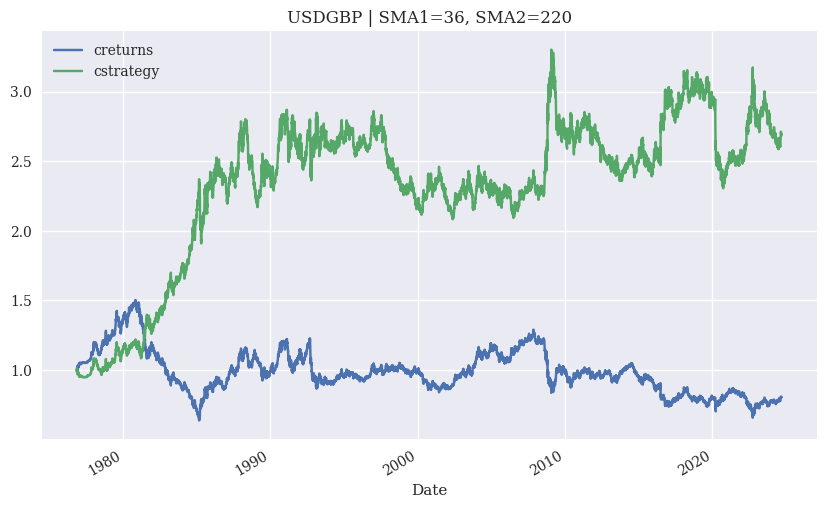

In [16]:
smabt.plot_results()